In [1]:
import pandas as pd
import micropip
import matplotlib.pyplot as mp
await micropip.install("openpyxl")
import openpyxl

# Question 1

In [2]:
Student_details = pd.read_excel("Tata NeuSkills Data Analytics Hackathon - Round 2.xlsx",sheet_name=0)
Grade = pd.read_excel("Tata NeuSkills Data Analytics Hackathon - Round 2.xlsx",sheet_name=4)

In [3]:
class_participation = pd.read_excel("Tata NeuSkills Data Analytics Hackathon - Round 2.xlsx",sheet_name=2)
a = {} 
for i in range(len(class_participation)):
    if class_participation["PollParticipation"][i]=="Yes" and class_participation["DoubtAsked"][i]=="No" and class_participation["QuestionsAnswered"][i]=="Yes":
        a["No Doubt Asked But Answer's Question"]=a.get("No Doubt Asked But Answer's Question",0)+1
    
    if class_participation["PollParticipation"][i]=="Yes" and class_participation["DoubtAsked"][i]=="No" and class_participation["QuestionsAnswered"][i]=="No":
        a["No Doubt Asked and Not Answer's Question"]=a.get("No Doubt Asked and Not Answer's Question",0)+1
    
    
    if class_participation["PollParticipation"][i]=="Yes" and class_participation["DoubtAsked"][i]=="Yes" and class_participation["QuestionsAnswered"][i]=="Yes":
        a["Doubt Asked and Answer's Question"]=a.get("Doubt Asked and Answer's Question",0)+1
    
    if class_participation["PollParticipation"][i]=="Yes" and class_participation["DoubtAsked"][i]=="Yes" and class_participation["QuestionsAnswered"][i]=="No":
        a["Doubt Asked and Not Answer's Question"]=a.get("Doubt Asked and Not Answer's Question",0)+1
    


class_participation = pd.DataFrame(a.items(),columns=['Categories', 'Count'])
class_participation

,Categories,Count
0,Doubt Asked and Answer's Question,25
1,Doubt Asked and Not Answer's Question,32
2,No Doubt Asked But Answer's Question,29
3,No Doubt Asked and Not Answer's Question,23


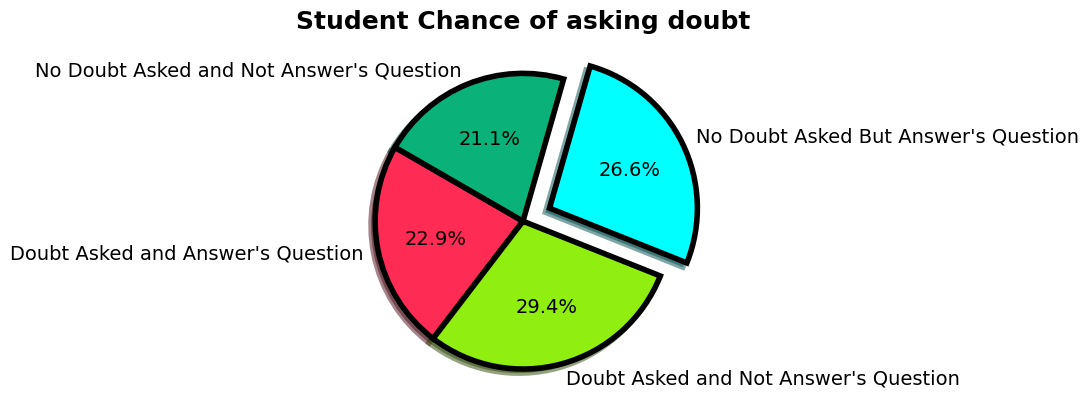

In [4]:
color=["#fe2c54","#90EE10","#00FFFF","#0AB27A"]
wedgeprops = {"linewidth": 4, 'width':1, "edgecolor":"k"}
mp.pie(class_participation["Count"],wedgeprops=wedgeprops,textprops={'fontsize': 14},labels=class_participation["Categories"],colors=color,startangle = 150,shadow=True,explode=[0,0,0.2,0], autopct='%1.1f%%')
mp.title("Student Chance of asking doubt", fontweight='bold',fontsize=18)
mp.savefig("tempo.png",bbox_inches = 'tight', transparent=True)
mp.show()

# Question 2

In [5]:
Toppers = pd.merge(Student_details,Grade,on="RollNo")

columns_to_sum = [i for i in range(Toppers.columns.get_loc("Test1"),Toppers.columns.get_loc("Test10")+1)]
Toppers["Sum"]=Toppers.iloc[:,columns_to_sum].sum(axis=1)
Toppers["Mean"]=Toppers.iloc[:,columns_to_sum].mean(axis=1)

Toppers = Toppers.iloc[:,[0,2,4,15,16]]
Marks = Toppers

Toppers=Toppers.sort_values(by=["Stream","Sum"],ascending=False).groupby("Stream",sort=True).head(3).reset_index(drop=True)

Toppers.iloc[0:3]

,RollNo,Stream,MaxMarks,Sum,Mean
0,10050015,Science,100,835,83.5
1,10050018,Science,100,812,81.2
2,10050005,Science,100,798,79.8


In [6]:
Toppers.iloc[3:7].reset_index(drop=True)

,RollNo,Stream,MaxMarks,Sum,Mean
0,10050028,Commerce,100,829,82.9
1,10050026,Commerce,100,789,78.9
2,10050024,Commerce,100,781,78.1


# Question 3

In [7]:
GradeDiff = Grade
GradeDiff=Grade.iloc[:,[2,3,4,5,6,7,8,9,10,11]].diff(axis=1)


GradeDiff["Sum_Difference"]=GradeDiff.iloc[:,[1,2,3,4,5,6,7,8,9]].sum(axis=1)
GradeDiff["Mean_Difference"]=GradeDiff.iloc[:,[1,2,3,4,5,6,7,8,9]].mean(axis=1)

GradeDiff.insert(0,"RollNo",Grade["RollNo"])

GradeDiff=GradeDiff.iloc[:,[0,11,12]]


GradeDiff=GradeDiff.sort_values(by=["Sum_Difference"]).reset_index(drop=True)
GradeDiff["Performance"]=None

for i in range(len(GradeDiff)):
 if GradeDiff["Mean_Difference"][i]>-1 and GradeDiff["Mean_Difference"][i]<1:
    GradeDiff["Performance"][i]="Consistent Performance"
 elif GradeDiff["Mean_Difference"][i]<1 :
    GradeDiff["Performance"][i]="Performance Declining"
 else:
    GradeDiff["Performance"][i]="Performance Increasing"

GradeDiff.rename(columns={"RollNo":"Students_Count"},inplace=True)
GradeDiff.groupby(["Performance"]).count().sort_values(by=["Students_Count"]).iloc[:,[0]]

<ipython-input-7-02f466a22142>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GradeDiff["Performance"][i]="Performance Declining"
<ipython-input-7-02f466a22142>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GradeDiff["Performance"][i]="Consistent Performance"
<ipython-input-7-02f466a22142>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GradeDiff["Performance"][i]="Performance Increasing"


,Students_Count
Performance,
Performance Declining,9
Consistent Performance,10
Performance Increasing,11


In [8]:
GradeDiff.groupby(["Performance","Students_Count"]).count().iloc[:,[]]

Empty DataFrame
Columns: []
Index: [(Consistent Performance, 10050004), (Consistent Performance, 10050006), (Consistent Performance, 10050008), (Consistent Performance, 10050012), (Consistent Performance, 10050014), (Consistent Performance, 10050016), (Consistent Performance, 10050019), (Consistent Performance, 10050020), (Consistent Performance, 10050023), (Consistent Performance, 10050029), (Performance Declining, 10050001), (Performance Declining, 10050003), (Performance Declining, 10050007), (Performance Declining, 10050013), (Performance Declining, 10050017), (Performance Declining, 10050021), (Performance Declining, 10050022), (Performance Declining, 10050027), (Performance Declining, 10050028), (Performance Increasing, 10050002), (Performance Increasing, 10050005), (Performance Increasing, 10050009), (Performance Increasing, 10050010), (Performance Increasing, 10050011), (Performance Increasing, 10050015), (Performance Increasing, 10050018), (Performance Increasing, 10050024), (Performance Increasing, 10050025), (Performance Increasing, 10050026), (Performance Increasing, 10050030)]

# Question 4

In [9]:
Attendance = pd.read_excel("Tata NeuSkills Data Analytics Hackathon - Round 2.xlsx",sheet_name=1)
attendance = Attendance
Attendance["Day_of_the_week"]=pd.to_datetime(Attendance["ClassDate"]).dt.day_name()

Attendance_T = Attendance

Attendance=Attendance.groupby("Day_of_the_week").count()
Attendance.rename(columns={"RollNo":"Count_Of_Students"},inplace=True)
Attendance.iloc[:,[0]].sort_values(by=["Count_Of_Students"],ascending=False)

,Count_Of_Students
Day_of_the_week,
Saturday,50
Sunday,50
Friday,34
Tuesday,30
Wednesday,30
Monday,28
Thursday,18


In [10]:
Attendance_T.drop(Attendance_T[((Attendance_T["Day_of_the_week"]!="Saturday")&(Attendance_T["Day_of_the_week"]!="Sunday"))].index,inplace=True)

Attendance_T["Jointime"]=pd.to_datetime(Attendance_T["JoinTime"])
Attendance_T["Leavetime"]=pd.to_datetime(Attendance_T["LeaveTime"])

Attendance_T["Jointime"]=Attendance_T["Jointime"].round("15min").dt.time
Attendance_T["Leavetime"]=Attendance_T["Leavetime"].round("15min").dt.time

Attendance_T = Attendance_T.groupby(["Jointime","Leavetime"]).count().sort_values(by=["RollNo"],ascending=False)
Attendance_T.rename(columns={"ClassDate":"Count_Of_Students"},inplace=True)

Attendance_T.iloc[:,[2]]

Count_Of_Students
Jointime Leavetime                   
09:00:00 10:30:00                  65
         10:15:00                  17
09:15:00 10:30:00                   9
09:00:00 10:45:00                   8
09:15:00 10:15:00                   1

# Question 5

In [11]:
online_videos = pd.read_excel("Tata NeuSkills Data Analytics Hackathon - Round 2.xlsx",sheet_name=3)
only_videos = list(online_videos)
only_videos.pop(0)
ind = online_videos.columns.get_indexer(only_videos)

online_videos["Sum"]=online_videos.iloc[:,ind].sum(axis=1)
online_videos["Mean"]=online_videos.iloc[:,ind].mean(axis=1)
only_videos.append("Sum")
only_videos.append("Mean")

ind = online_videos.columns.get_indexer(only_videos)
online_videos.iloc[:,ind]=online_videos.iloc[:,ind]*100
online_videos = online_videos.iloc[:,[0,15,16]]
On_off = pd.merge(online_videos,Marks,on="RollNo")
On_off.rename(columns={"Sum_x":"Video_sum", "Mean_x":"Video_mean", "Sum_y":"Mark_sum","Mean_y":"Marks_mean"},inplace=True)

On_off=On_off.sort_values(by=["Video_mean"])
On_off.iloc[:,[0,2,6]].reset_index()

On_off.iloc[:,[2,6]].corr()

,Video_mean,Marks_mean
Video_mean,1.000000,-0.866494
Marks_mean,-0.866494,1.000000


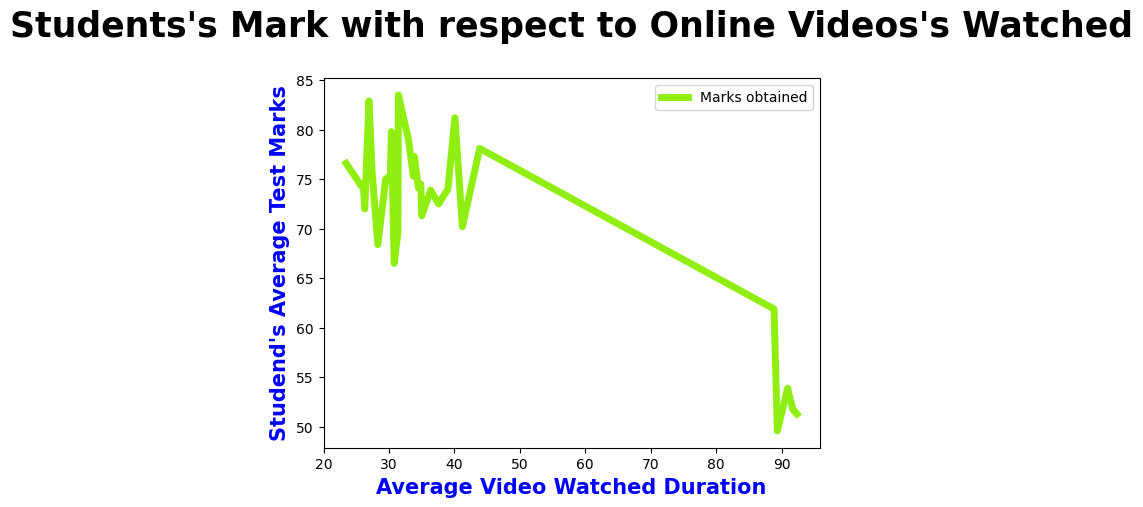

In [12]:
On_off.plot(x = 'Video_mean', y = 'Marks_mean',color="#90EE10",linewidth=5)
mp.legend(["Marks obtained"])
mp.rcParams['axes.titlepad'] = 30

mp.title("Students's Mark with respect to Online Videos's Watched",fontsize=25,fontweight="bold",color="black")
mp.xlabel("Average Video Watched Duration",fontsize=15,fontweight="bold",color="blue")
mp.ylabel("Studend's Average Test Marks",fontsize=15,fontweight="bold",color="blue")


mp.savefig("temp.png",bbox_inches = 'tight', transparent=True)
mp.show()

# Question 6

In [13]:
Student_test_scores = list(Grade.iloc[:,[2,3,4,5,6,7,9,10,11]].loc[20])
test_name = list(Grade.iloc[:,[2,3,4,5,6,7,9,10,11]].head(1))
Test_sco = pd.DataFrame(Student_test_scores,test_name).T
Test_sco

,Test1,Test2,Test3,Test4,Test5,Test6,Test8,Test9,Test10
0,93,85,65,57,63,92,65,63,65


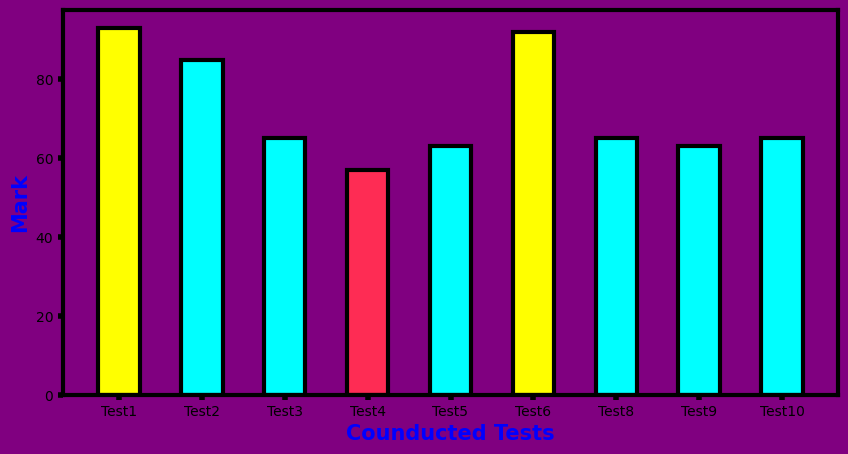

RollNo      10050021
Stream      Commerce
MaxMarks         100
Sum              720
Mean            72.0
Name: 20, dtype: object

In [14]:
mp.rcParams['figure.figsize'] = [10,5]
mp.figure(facecolor='purple')
ax = mp.axes()
ax.tick_params(width=4)
mp.setp(ax.spines.values(), linewidth=3)
ax.set_facecolor("purple")

mp.xlabel("Counducted Tests",color="blue",fontweight="bold",fontsize=15)
mp.ylabel("Mark",color="blue",fontweight="bold",fontsize=15)

color =[]
for i in range(len(Student_test_scores)):
  if Student_test_scores[i]>90:
    color.append("yellow")
  elif Student_test_scores[i]<60:
    color.append("#fe2c54")
  else:
    color.append("cyan")

mp.bar(test_name,Student_test_scores,color=color,width=0.5,linewidth=3,edgecolor='black')
mp.savefig("123.png")
mp.show()

attendance_Percent = attendance
attendan=attendance_Percent.groupby(["RollNo"]).count().sort_values(by=["RollNo"]).iloc[:,[0,1]]

Marks.loc[20]